In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/nestle.csv')

In [ ]:
pd.pandas.set_option('display.max_columns',None)

In [ ]:
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-April-2022,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,20-April-2022,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,19-April-2022,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18-April-2022,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,13-April-2022,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30


In [ ]:
df.shape

(2553, 13)

In [ ]:
df.columns

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open'],
      dtype='object')

#Date: The date for the stock data entry. It represents the time dimension for historical analysis.

#Open Price: The stock price at the beginning of the trading day.

#High Price: The highest price reached by the stock during the trading day.

#Low Price: The lowest price reached by the stock during the trading day.

#Close Price: The stock price at the end of the trading day. Typically used as the target in predictive models.

#WAP (Weighted Average Price): The average price of the stock during the trading day, weighted by volume.

#No. of Shares: The total number of shares traded during the day.

#No. of Trades: The total number of trades executed for the stock during the day.

#Total Turnover (Rs.): The total monetary value of shares traded during the day.

#Deliverable Quantity: The number of shares delivered after being traded, representing shares held by investors rather than traded back.

#% Deli. Qty to Traded Qty: The percentage of the deliverable quantity relative to the total traded quantity, indicating the proportion of shares intended for holding versus speculative trading.

#Spread High-Low: The difference between the high and low prices of the stock during the trading day, showing the price volatility.

#Spread Close-Open: The difference between the closing and opening prices of the stock, representing the net price change during the day.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2553 non-null   object 
 1   Open Price                 2553 non-null   float64
 2   High Price                 2553 non-null   float64
 3   Low Price                  2553 non-null   float64
 4   Close Price                2553 non-null   float64
 5   WAP                        2553 non-null   float64
 6   No.of Shares               2553 non-null   int64  
 7   No. of Trades              2553 non-null   int64  
 8   Total Turnover (Rs.)       2553 non-null   float64
 9   Deliverable Quantity       2551 non-null   float64
 10  % Deli. Qty to Traded Qty  2551 non-null   float64
 11  Spread High-Low            2553 non-null   float64
 12  Spread Close-Open          2553 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

In [ ]:
df.isnull().sum()

,0
Date,0
Open Price,0
High Price,0
Low Price,0
Close Price,0
WAP,0
No.of Shares,0
No. of Trades,0
Total Turnover (Rs.),0
Deliverable Quantity,2


<Axes: xlabel='Deliverable Quantity', ylabel='Density'>

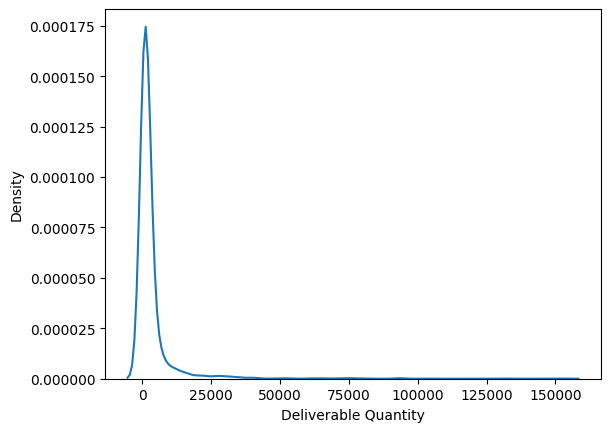

In [ ]:
sns.kdeplot(df['Deliverable Quantity'])

In [ ]:
from sklearn.impute import SimpleImputer
median_imputer=SimpleImputer(strategy='most_frequent')

In [ ]:
df.loc[:,'Deliverable Quantity']=median_imputer.fit_transform(df[['Deliverable Quantity']])

In [ ]:
df.isnull().sum()

,0
Date,0
Open Price,0
High Price,0
Low Price,0
Close Price,0
WAP,0
No.of Shares,0
No. of Trades,0
Total Turnover (Rs.),0
Deliverable Quantity,0


In [ ]:
from sklearn.impute import SimpleImputer
mean_imputer=SimpleImputer(strategy='most_frequent')

In [ ]:
df.loc[:, '% Deli. Qty to Traded Qty'] = mean_imputer.fit_transform(df[['% Deli. Qty to Traded Qty']])


In [ ]:
df.isnull().sum()

,0
Date,0
Open Price,0
High Price,0
Low Price,0
Close Price,0
WAP,0
No.of Shares,0
No. of Trades,0
Total Turnover (Rs.),0
Deliverable Quantity,0


In [ ]:
df.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2.553000e+03,2553.000000,2553.000000,2553.000000,2553.000000
mean,9338.023188,9429.710419,9226.855934,9324.960556,9327.503179,5521.380337,1004.099491,4.761923e+07,3261.919311,49.008531,202.854485,-13.062632
std,4940.554627,4986.783271,4878.971233,4932.776537,4929.373727,10416.942384,1137.547557,8.502888e+07,8649.805164,19.120714,174.985173,157.849187
min,3970.000000,3995.000000,3930.000000,3942.450000,3936.768632,39.000000,6.000000,1.721420e+05,33.000000,1.270000,17.000000,-1381.300000
25%,5391.000000,5445.000000,5327.200000,5383.500000,5385.347807,1572.000000,442.000000,1.172133e+07,653.000000,35.570000,88.850000,-71.700000
50%,6804.000000,6868.900000,6747.300000,6809.950000,6813.150538,2618.000000,731.000000,2.222074e+07,1122.000000,46.830000,152.100000,-12.750000
75%,13299.950000,13690.950000,12850.000000,13455.450000,13387.505382,4981.000000,1199.000000,4.938465e+07,2221.000000,59.130000,263.150000,48.300000
max,20452.000000,20599.950000,20243.800000,20439.450000,20417.372402,154684.000000,20964.000000,2.155655e+09,152993.000000,98.930000,1950.000000,1523.300000


In [ ]:
df.dtypes

,0
Date,object
Open Price,float64
High Price,float64
Low Price,float64
Close Price,float64
WAP,float64
No.of Shares,int64
No. of Trades,int64
Total Turnover (Rs.),float64
Deliverable Quantity,float64


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Open Price,float64
High Price,float64
Low Price,float64
Close Price,float64
WAP,float64
No.of Shares,int64
No. of Trades,int64
Total Turnover (Rs.),float64
Deliverable Quantity,float64


#NUMERICAL_DATA[Date, 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP','No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)','Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low', 'Spread Close-Open']

**#UNIVARIENT ANALYSIS**
#numerical_data

<Axes: xlabel='Open Price', ylabel='Count'>

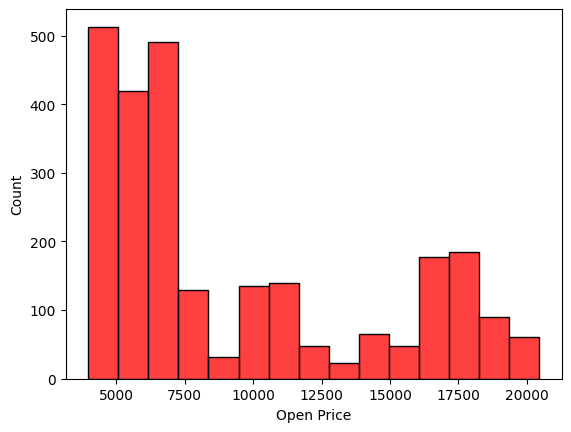

In [ ]:
sns.histplot(df['Open Price'],color='red')

<Axes: xlabel='High Price', ylabel='Count'>

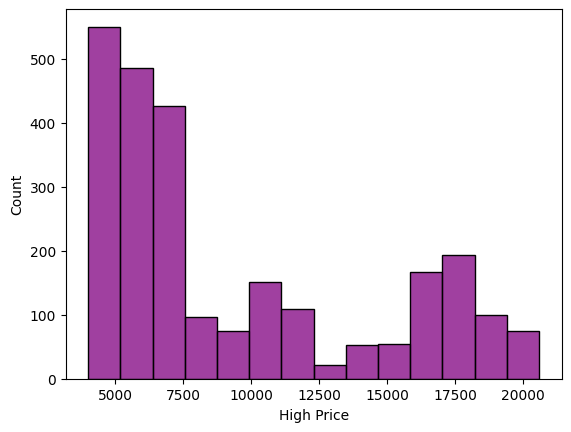

In [ ]:
sns.histplot(df['High Price'],color='purple')

<Axes: xlabel='Low Price', ylabel='Count'>

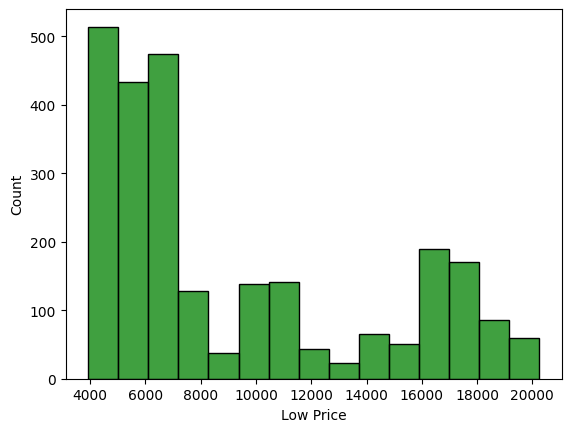

In [ ]:
sns.histplot(df['Low Price'],color='green')

<Axes: xlabel='Close Price', ylabel='Count'>

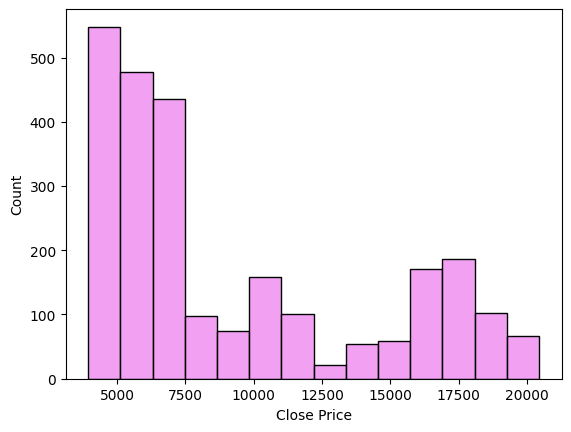

In [ ]:
sns.histplot(df['Close Price'],color='violet')

<Axes: xlabel='WAP', ylabel='Count'>

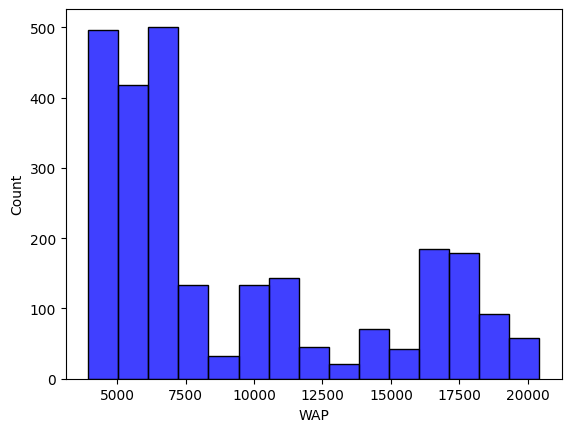

In [ ]:
sns.histplot(df['WAP'],color='blue')

<Axes: xlabel='No.of Shares', ylabel='Count'>

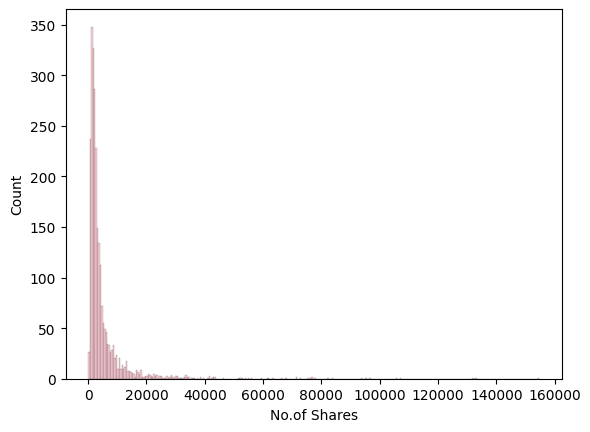

In [ ]:
sns.histplot(df['No.of Shares'],color='pink')

<Axes: xlabel='No. of Trades', ylabel='Count'>

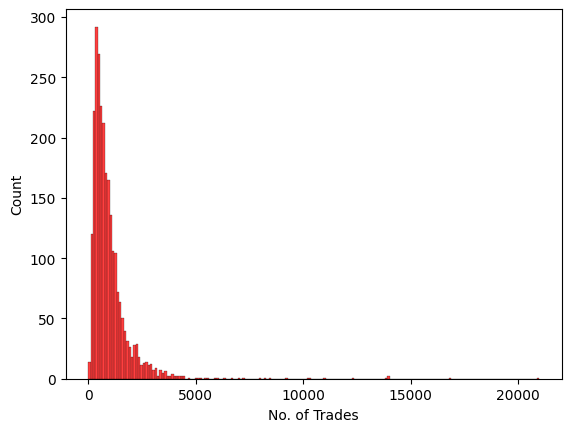

In [ ]:
sns.histplot(df['No. of Trades'],color='red')

<Axes: xlabel='Total Turnover (Rs.)', ylabel='Count'>

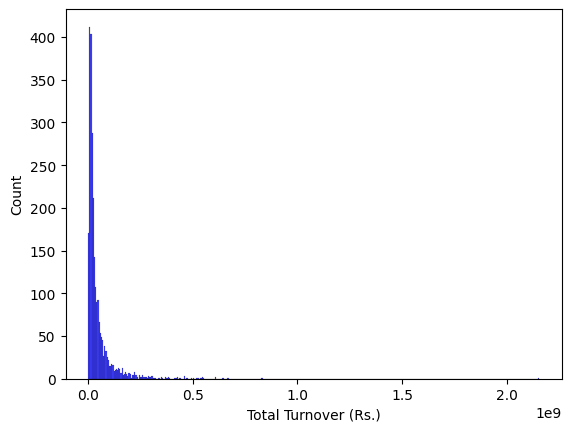

In [ ]:
sns.histplot(df['Total Turnover (Rs.)'],color='blue')

<Axes: xlabel='Deliverable Quantity', ylabel='Count'>

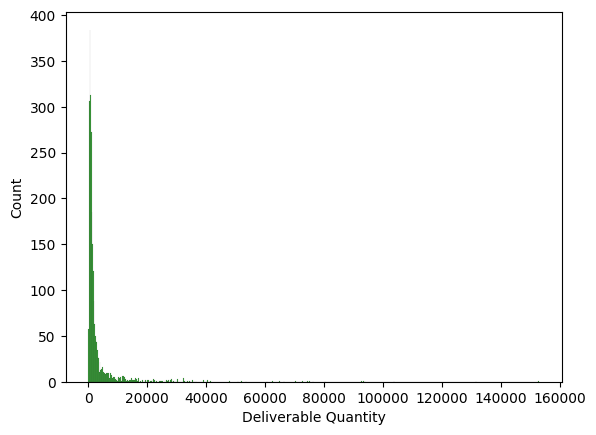

In [ ]:
sns.histplot(df['Deliverable Quantity'],color='green')

<Axes: xlabel='% Deli. Qty to Traded Qty', ylabel='Count'>

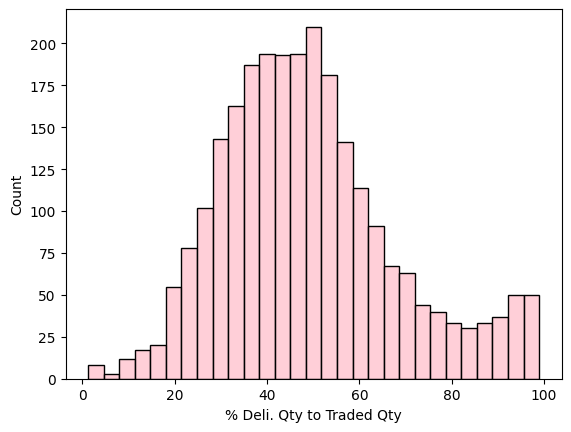

In [ ]:
sns.histplot(df['% Deli. Qty to Traded Qty'],color='pink')

<Axes: xlabel='Spread High-Low', ylabel='Count'>

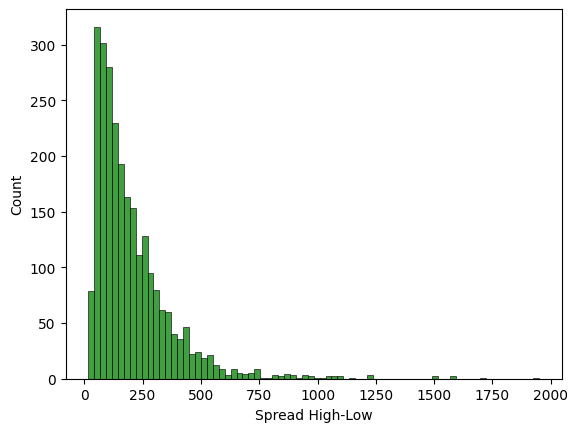

In [ ]:
sns.histplot(df['Spread High-Low'],color='green')

<Axes: xlabel='Spread Close-Open', ylabel='Count'>

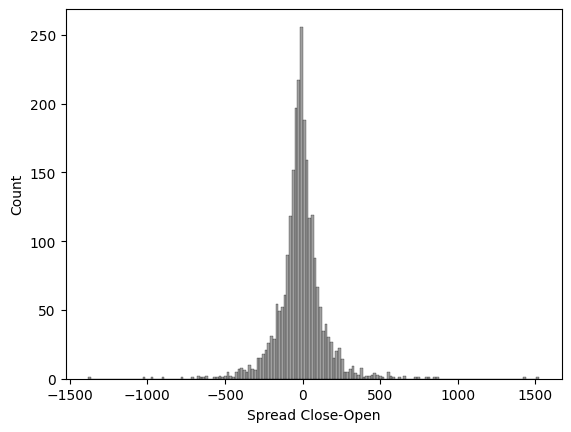

In [ ]:
sns.histplot(df['Spread Close-Open'],color='grey')

#BIVARIENT ANALYSIS
#Numerical vs Numerical

<Axes: xlabel='Date', ylabel='High Price'>

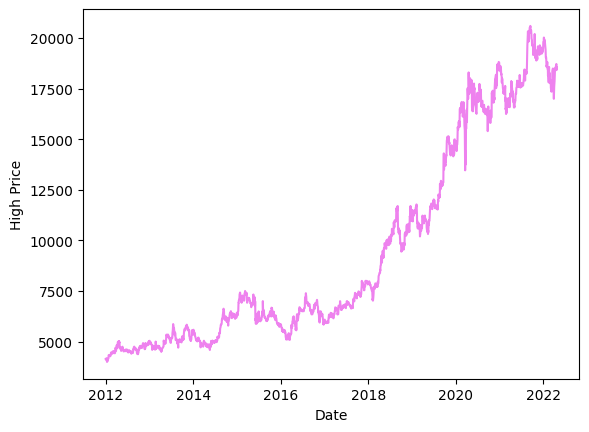

In [ ]:
sns.lineplot(x='Date',y='High Price',data=df,color='violet')

<Axes: xlabel='Date', ylabel='Low Price'>

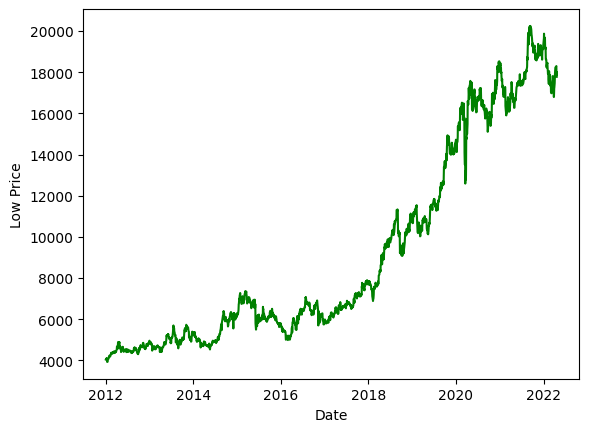

In [ ]:
sns.lineplot(x='Date',y='Low Price',data=df,color='green')

<Axes: xlabel='Date', ylabel='No.of Shares'>

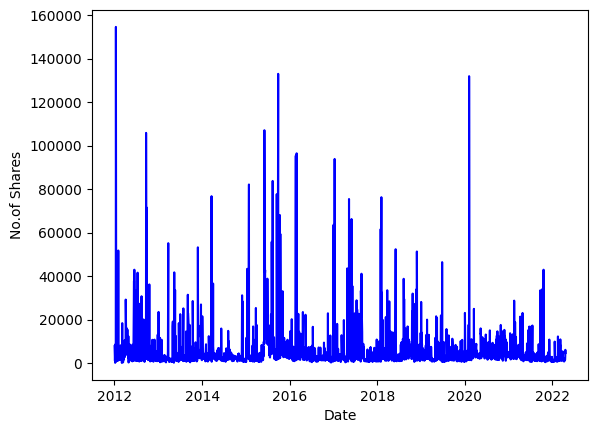

In [ ]:
sns.lineplot(x='Date',y='No.of Shares',data=df,color='blue')

<Axes: xlabel='Date', ylabel='No. of Trades'>

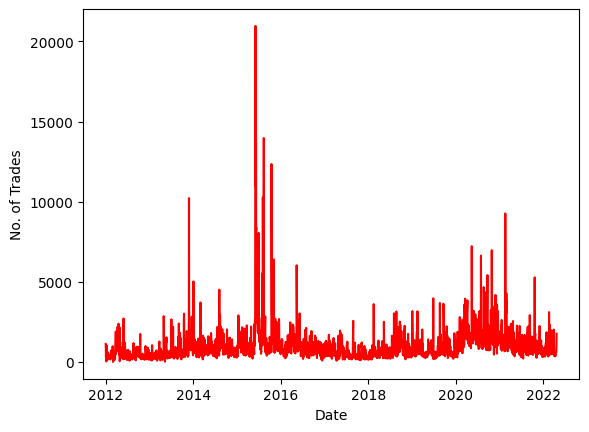

In [ ]:
sns.lineplot(x='Date',y='No. of Trades',data=df,color='red')

<Axes: xlabel='No.of Shares', ylabel='No. of Trades'>

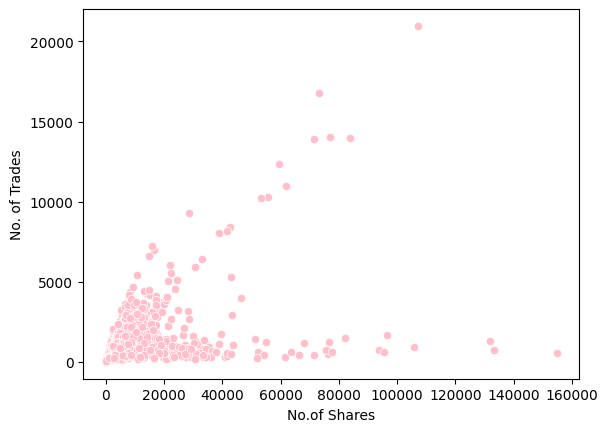

In [ ]:
sns.scatterplot(x='No.of Shares',y='No. of Trades',data=df,color='pink')

<Axes: xlabel='Date', ylabel='Deliverable Quantity'>

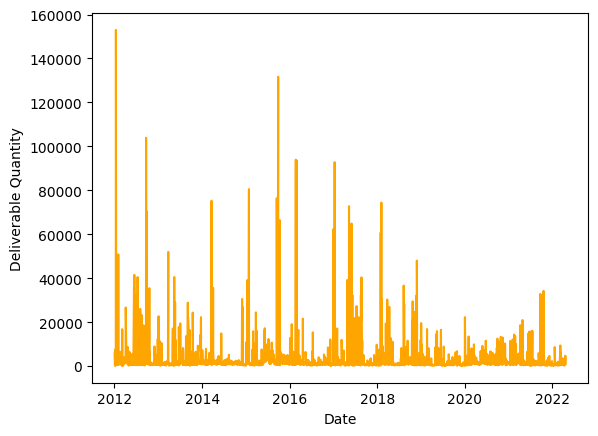

In [ ]:
sns.lineplot(x='Date',y='Deliverable Quantity',data=df,color='orange')

<Axes: xlabel='Date', ylabel='Spread High-Low'>

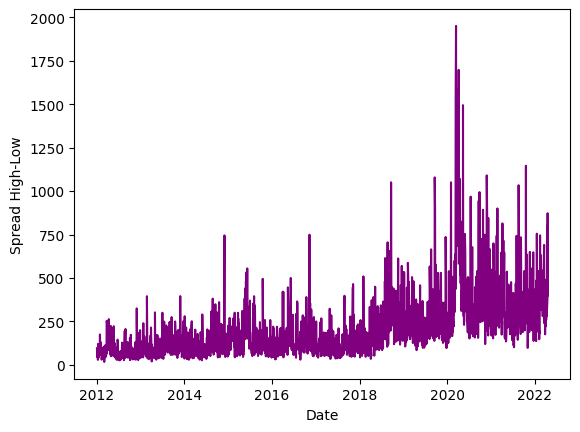

In [ ]:
sns.lineplot(x='Date',y='Spread High-Low',data=df,color='purple')

#**DATA PRE-PROCESSING**



In [ ]:
df.isnull().sum()

,0
Date,0
Open Price,0
High Price,0
Low Price,0
Close Price,0
WAP,0
No.of Shares,0
No. of Trades,0
Total Turnover (Rs.),0
Deliverable Quantity,0


In [ ]:
df.drop('Date',axis=1,inplace=True)

In [ ]:
df

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30
...,...,...,...,...,...,...,...,...,...,...,...,...
2548,4114.00,4160.00,4076.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25
2549,4118.00,4126.90,4080.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15
2550,4100.00,4125.00,4081.40,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60
2551,4061.00,4110.10,4060.10,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35


In [ ]:
X=df.iloc[:,df.columns!='Close Price']

In [ ]:
X

,Open Price,High Price,Low Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,18150.00,18572.95,17772.90,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,18100.10,18415.00,18017.15,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,18470.05,18718.00,17845.60,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18294.50,18684.50,18294.50,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,18371.20,18549.30,18248.25,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30
...,...,...,...,...,...,...,...,...,...,...,...
2548,4114.00,4160.00,4076.00,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25
2549,4118.00,4126.90,4080.00,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15
2550,4100.00,4125.00,4081.40,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60
2551,4061.00,4110.10,4060.10,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35


In [ ]:
y=df['Close Price']

In [ ]:
y.shape

(2553,)

In [ ]:
df.shape

(2553, 12)

In [ ]:
df['Close Price'].value_counts()

,count
Close Price,
4589.45,2
17495.70,2
7695.00,2
6443.50,2
17618.80,2
...,...
10655.05,1
10447.80,1
10385.95,1


**CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[['Open Price','High Price','Low Price','WAP','No.of Shares','No. of Trades','Total Turnover (Rs.)','Deliverable Quantity','% Deli. Qty to Traded Qty','Spread High-Low','Spread Close-Open']]


In [ ]:
y=df['Close Price']

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

scores = cross_val_score(model, X, y, cv=kf,scoring='neg_mean_squared_error')
print("K-Fold CV Scores:", scores)
print("Mean MSE:", -np.mean(scores))

K-Fold CV Scores: [-2.16745602e-22 -3.22976393e-22 -3.02422736e-23 -1.19436974e-21
 -9.49051889e-23]
Mean MSE: 3.718478386643244e-22


**CHECKING BASELINE MEAN_SQUARED_ERROR**




In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred_baseline = np.full_like(y, np.mean(y), dtype=float)
baseline_mse = mean_squared_error(y, y_pred_baseline)
print(f"Baseline MSE: {baseline_mse}")

Baseline MSE: 24322753.50878496


** Cross-validation using MSE (neg_mean_squared_error as scoring)**

---



In [ ]:
scores = cross_val_score(model, X, y, cv=kf,
scoring='neg_mean_squared_error')
mean_mse = -np.mean(scores)
print(f"Model Mean MSE from Cross-Validation: {mean_mse}")

Model Mean MSE from Cross-Validation: 3.718478386643244e-22


**COMPARISON**




In [ ]:
if mean_mse < baseline_mse:
    print("The model performs better than the baseline model.")
else:
    print("The model performs worse than the baseline model.")

The model performs better than the baseline model.


**# Calculating correlation with the target variable**




In [ ]:
correlation = df.corr()['Close Price'].drop('Close Price')
print("Correlation with Target:\n", correlation)

Correlation with Target:
 Open Price                   0.999490
High Price                   0.999793
Low Price                    0.999761
WAP                          0.999927
No.of Shares                -0.075764
No. of Trades                0.156813
Total Turnover (Rs.)         0.191751
Deliverable Quantity        -0.093267
% Deli. Qty to Traded Qty   -0.247117
Spread High-Low              0.616866
Spread Close-Open           -0.033314
Name: Close Price, dtype: float64


**# Select features with high correlation**




In [ ]:
selected_features = correlation[correlation.abs() > 0.5].index
print("Selected Features:\n", selected_features)

Selected Features:
 Index(['Open Price', 'High Price', 'Low Price', 'WAP', 'Spread High-Low'], dtype='object')


#**Mutual Information**
#**Captures non-linear relationships between features  and the target.**

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
mi = mutual_info_regression(X, y)
print("Mutual Information Scores:\n", mi)


Mutual Information Scores:
 [3.17981353 3.8140671  3.87352094 4.15236699 0.05687106 0.18609511
 0.21783841 0.04776021 0.12516226 0.40873604 0.16999911]


**# Sequential Feature Selector**:Adds or removes features iteratively based on cross-validation • performance.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=2, direction='forward')
sfs.fit(X, y)
print("Selected Features Mask:\n", sfs.get_support())

Selected Features Mask:
 [False False False  True False False False False False False  True]


**Train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Remove stratify = y

**Split the training set into training and validation sets**

---




In [ ]:
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
model = RandomForestRegressor()


In [ ]:
model.fit(X_train_final, y_train_final)


RandomForestRegressor()

# Evaluate the model on the validation set

In [ ]:
validation_score = model.score(X_val, y_val)
print(f'Validation Accuracy: {validation_score}')

Validation Accuracy: 0.99978045425535


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared


In [ ]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 13382.644676837033
Root Mean Squared Error: 115.68338116098195
R-squared: 0.9994530092915144


**HYPERPARAMETR_TUNING**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import randint

In [ ]:
param_dist = {'n_estimators': randint(50, 200),'max_depth': randint(3, 10),'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']}
random_search = RandomizedSearchCV(RandomForestRegressor(), param_dist, n_iter=10, cv=3,
scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/us

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 6, 'n_estimators': 142}
Best Score: nan


In [ ]:
test_score = model.score(X_test, y_test)
print(f'Test Accuracy: {test_score}')

Test Accuracy: 0.9994530092915144


**Scaling data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)

In [ ]:
normalized_data

array([[0.86033248, 0.87792797, 0.84853927, ..., 0.19895556, 0.40509571,
        0.49476692],
       [0.85730494, 0.86841574, 0.86351126, ..., 0.7760598 , 0.19702535,
        0.54909454],
       [0.87975064, 0.88666331, 0.85299562, ..., 0.55785378, 0.44252457,
        0.2941541 ],
       ...,
       [0.00788739, 0.00782899, 0.00928049, ..., 0.81558468, 0.01376099,
        0.48264821],
       [0.00552117, 0.00693167, 0.00797484, ..., 0.56358796, 0.01707191,
        0.48738208],
       [0.01030822, 0.00872631, 0.00698795, ..., 0.74912963, 0.04081738,
        0.45161124]])

In [ ]:
X_train

,Open Price,High Price,Low Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
2076,5449.00,5499.90,5125.00,5324.711191,17309,3583,92165426.0,6110.0,35.30,374.90,-210.10
1917,4960.85,5010.00,4945.00,4979.873905,571,232,2843508.0,280.0,49.04,65.00,15.95
1674,5946.00,6003.00,5917.30,5978.025741,7964,1368,47608997.0,3550.0,44.58,85.70,22.70
2259,4700.00,4778.00,4700.00,4749.810078,3354,723,15930863.0,1873.0,55.84,78.00,52.85
2236,4607.20,4624.00,4548.25,4575.545619,1107,284,5065129.0,711.0,64.23,75.75,-46.35
...,...,...,...,...,...,...,...,...,...,...,...
1638,6100.00,6100.00,5900.05,5960.233953,6403,1477,38163378.0,1610.0,25.14,199.95,-72.90
1095,7766.00,7818.70,7646.95,7725.677786,2548,471,19685027.0,915.0,35.91,171.75,-106.40
1130,7150.00,7172.00,7050.00,7088.787995,783,194,5550521.0,348.0,44.44,122.00,-77.85
1294,5970.00,6009.00,5870.00,5930.877532,4246,1143,25182506.0,1982.0,46.68,139.00,-48.55


In [ ]:
X_train_scaled

array([[-0.78507288, -0.78599626, -0.83888803, ..., -0.7284909 ,
         1.02593401, -1.28205504],
       [-0.88401241, -0.88434218, -0.87582129, ..., -0.01478861,
        -0.81086445,  0.1729214 ],
       [-0.68433962, -0.68500047, -0.67632013, ..., -0.24645616,
        -0.68817414,  0.21636794],
       ...,
       [-0.44030973, -0.4503273 , -0.44390734, ..., -0.25372824,
        -0.47302156, -0.43082463],
       [-0.67947523, -0.68379599, -0.68602537, ..., -0.13737503,
        -0.3722614 , -0.24223445],
       [ 0.08463828,  0.069537  ,  0.08518212, ...,  2.33876676,
        -0.40752745, -0.10642378]])

**model training**

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

**Model evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
predictions = model.predict(X)

In [ ]:
print("Predictions:", predictions)

Predictions: [18205.8  18313.7  17943.15 ...  4120.6   4095.35  4070.35]


In [ ]:
print("MSE:", mean_squared_error(y, predictions))

MSE: 4.861176514267151e-23


In [ ]:
from sklearn.linear_model import Ridge


In [ ]:
ridge_model = Ridge(alpha=1.0)


In [ ]:
ridge_model.fit(X, y)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.41861e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [ ]:
print("Ridge Coefficients:", ridge_model.coef_)


Ridge Coefficients: [ 9.99999501e-01 -1.98361125e-05  2.01144170e-05  2.21114429e-07
  3.55541925e-10 -1.04635477e-09 -2.87045478e-14 -2.57647740e-10
  6.93624670e-08  1.99907151e-05  9.99999666e-01]


In [ ]:
from sklearn.linear_model import Lasso


In [ ]:
lasso_model = Lasso(alpha=0.1)


In [ ]:
lasso_model.fit(X, y)


Lasso(alpha=0.1)

In [ ]:
print("Lasso Coefficients:", lasso_model.coef_)

Lasso Coefficients: [ 9.99269035e-01  5.72038474e-04 -3.06154834e-06  1.69534661e-04
  3.69175319e-05 -8.60609337e-05 -1.54881904e-09 -2.90986891e-05
  1.84775874e-03 -9.25269543e-05  9.99547605e-01]


**Save the model**

In [ ]:
import pickle

In [ ]:
with open("Lasso.pkl","wb") as file:
    pickle.dump(model,file)

In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
X_test


,Open Price,High Price,Low Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
1949,4960.00,4960.00,4799.00,4839.650180,3336,1253,16145073.0,1800.0,53.96,161.00,-147.05
637,13563.00,14128.25,13550.00,13857.238212,7359,1895,101975416.0,2651.0,36.02,578.25,382.10
2150,5261.50,5261.50,5090.00,5126.032832,3594,943,18422962.0,2167.0,60.29,171.50,-160.00
393,16149.30,16248.00,15925.00,16028.584857,3117,1710,49961099.0,1231.0,39.49,323.00,-50.40
1023,7777.00,7876.10,7777.00,7851.701140,2456,701,19283778.0,1490.0,60.67,99.10,73.55
...,...,...,...,...,...,...,...,...,...,...,...
2460,4574.95,4679.95,4520.00,4594.909013,2330,432,10706138.0,1112.0,47.73,159.95,52.50
1196,6704.30,6776.10,6637.55,6703.595238,882,308,5912571.0,272.0,30.84,138.55,63.05
361,17100.00,17200.00,16852.00,17065.197338,2179,1083,37185065.0,715.0,32.81,348.00,-104.40
2104,5125.00,5374.80,5125.00,5286.497353,28527,2662,150807910.0,24311.0,85.22,249.80,160.00


In [ ]:
x={'Open Price':6704.0,'High Price':5734,'Low Price':4567,'WAP':6703.595238,'No.of Shares':882,'No. of Trades':986,'Total Turnover (Rs.)':49961099.0,'Deliverable Quantity':1400.0,'% Deli. Qty to Traded Qty':67.0,'Spread High-Low':141.0,'Spread Close-Open':654.0}

In [ ]:
x=pd.DataFrame([x])

In [ ]:
x

,Open Price,High Price,Low Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,6704.0,5734,4567,6703.595238,882,986,49961099.0,1400.0,67.0,141.0,654.0


In [ ]:

prediction=model.predict(x)

In [ ]:
prediction

array([7358.])